# FOAD 5
## APPLICATION DES PARCOURS DE GRAPHES SUR UN PROBLEME REEL

Cette séquence a pour objectif de vous familiariser avec les graphes et leurs parcours.




## Extrait du programme NSI terminale
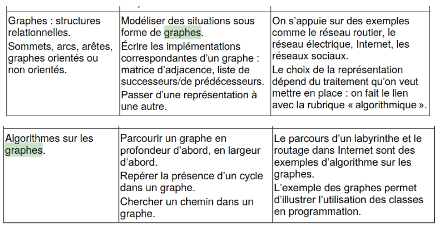

## Contextualisation et données du problème
Le problème consiste a fournir le trajet optimal, à une tondeuse à gazon, afin de tondre la pelouse d'un jardin tout en évitant les obstacles.
Exemple de jardin : 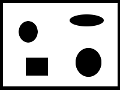
Les parties noires représentent les obstacles à éviter, la partie blanche correspond à la pelouse à tondre.
Nous allons utiliser les graphes et leurs parcours pour trouver des solutions à ce problème.


La première étape consiste à générer une matrice de points à partir de l'image du jardin. Pour cela, on utilisera la bibliothèque openCV. Appliquons la méthode cv2.imread sur une image de taille 3x3 :
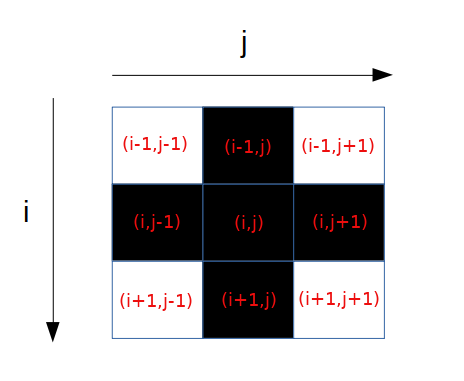

In [ ]:
import cv2
img = cv2.imread(r"images/image3.png")
print (img)


Cette méthode renvoi une matrice de 3x3, correspondant à la taille de l'image, avec pour chacun des pixels, un triplet de valeurs correspondant aux valeurs de Bleu, Vert, Rouge pour le pixel concerné. Dans notre cas, la valeur 0 pour chaque élément du triplet correspond au Noir et la valeur 255 au Blanc.


Nous modelisons notre problème en utilisant un graphe un peu particulier. En effet, les pixels de l'image seront représentés par les sommets, et chaque pixel sera relié à son voisin direct avec une arête.
Exemple sur une image 3x3 :
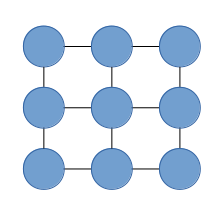
Au final, nous aurons pour chaque pixel les informations suivantes :
  - Sa position sur l'image : ligne i et colonne j de la matrice correspondante
  - La valeur de la couleur composé par un triplet BGR
  

## Quelques défintions  
Rechercher les définitions et expliquer les particularités des graphes suivants :
- graphe connexe      rep:un graphe non orienté est dit connexe s'il est d'un seul tenant.
- graphe planaire     rep:un graphe qui a la particularité de pouvoir se représenter sur un plan sans qu'aucune                              arête n'en croise une autre.
- graphe régulier     rep:tous les sommets ont le même nombre de voisins
- graphe non-orienté  rep: inversement, Un graphe est orienté si ses arêtes, appelées arcs,dans ce cas, ont un                                sens de parcours.
- graphe pondéré      rep:un graphe (orienté ou non) dont les arêtes ont été affectées d'un nombre appelé poids                             (ou coût).

D'après vous, comment pourrait-on qualifier le graphe issue de notre image de jardin? 

rep: graphe connexe planaire régulier pondéré avec des poids identiques


### Parcours du graphe
Le parcours générique d'un graphe G s'effectue à partir d'un sommet de départ noté s  
>**seen = [s]** _;seen est une liste qui comportera les sommets qui auront été visités_  
>**todo = voisins(s)** _;todo est une liste qui contiendra les voisins_  
>**tant que todo != 0** 
 >>   **choisir u dans todo** ;_on prend un voisin parmi ceux présent dans todo_  
 >>   **seen <= u**         ; _u est considéré comme visité, on le stock dans seen_   
 >>   **todo = todo - (u)** ; _u est extrait de la liste todo_  
 >>   **todo <= voisins de u** ; _on stock dans todo les voisins de u_  

### Parcours en largeur  
Exécuter le programme suivant, visualiser le résulat.  
Expliquez, comment le graphe est parcouru.  
ATTENTION : Il faut appuyer sur une touche lorsque le programme est terminé, autrement le notebook plantera

Explications:
* 
*  rep: Parcours en largeur la tonte s'étend de proche en proche , mais les obstacles sont "sautés" c'est embétant pour la tondeuse

In [ ]:
#PARCOURS EN LARGEUR, 4 VOISINS, SENS ANTI-HORAIRE
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def bfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop(0)  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i+1,j), (i-1,j),(i,j+1), (i,j-1)] #les voisins sont les proches pixels verticaux et horizontaux
    return seen


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width, depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = bfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

* Proposer une instruction qui remplacerait la ligne 16, en utilsant une méthode de l'objet liste "todo".  
Bien sûr, cette instruction aura exactement le même résultat que celle qu'elle remplace.

In [ ]:
#réponse à la question"remplacer la ligne 16"
#PARCOURS EN LARGEUR, 4 VOISINS, SENS ANTI-HORAIRE
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def bfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop(0)
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            for voisin in ((i+1,j), (i-1,j),(i,j+1), (i,j-1)):
                todo.append(voisin)
            #todo += [(i+1,j), (i-1,j),(i,j+1), (i,j-1)] #les voisins sont les proches pixels verticaux et horizontaux
    return seen


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width, depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = bfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

### Parcours en profondeur  
Même étude que précedemment, analyser le code suivant, et visualiser le résultat.  
ATTENTION : Il faut appuyer sur une touche lorsque le programme est terminé, autrement le notebook plantera.

Explications:
* 
*   rep: bien plus adapté pour la tonte, même si parfois des zones éloignés apparaissent obligeant à parcourir de grandes distances pour les tondre.

In [ ]:
#PARCOUR EN PROFONDEUR, 4 VOISINS, SENS ANTI-HORAIRE
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i+1,j), (i-1,j),(i,j+1), (i,j-1)] #les voisins sont les proches pixels verticaux et horizontaux
    return seen


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

- Expliquer, la manière dont le graphe est parcouru.  
- La différence majeure qui existe entre ces 2 programmes réside dans la manière dont les données sont stockées et déstockées dans la liste "todo". Pour bien comprendre le mécanisme de ces algorithmes, vous ferez des recherches sur les structures de données de type FIFO (ou queue) et LIFO (ou stack), vous synthétisez vos recherches en quelques lignes.  
- Vous identifierez quelle est la structure de données utilisée pour quel parcours.
* 
* 
* 
* 
* 
* 
* 
* 

# MODIFICATION DE LA CONFIGURATION DU GRAPHE

## CAS N°1 :  
Chaque sommet possède 2 voisins , celui à droite et celui au dessous.  
Implémenter le parcours en largeur et conclure sur la performance de ce parcours.
* 
*  rep: balayage de la zone en bas à droite

In [ ]:
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def bfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop(0) 
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j)] #les voisins sont celui à droite, et celui en dessous
    return seen 


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = bfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()


## CAS N°2 :

Chaque sommet possède 3 voisins , ces 2 voisins horizontaux et celui au dessous (cette liaison sera orientée).
Implémenter les 2 parcours (BFS et DFS) et conclure sur la performance de ces 2 parcours.
* 
* 
* 
* 
* rep: le balayage ne peut pas dépasser vers le haut les coordonnées de départ. 

In [ ]:
# PARCOURS EN LARGEUR, 3 VOISINS, SENS HORAIRE
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def bfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop(0)  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j), (i,j-1)] #les voisins sont les proches pixels HORIZONTAUX et CELUI EN DESSOUS
    return seen 


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = bfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()


In [ ]:
# PARCOURS EN PROFONDEUR , 3 VOISINS, SENS ANTI HORAIRE

import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop() 
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j), (i,j-1)] #les voisins sont les proches pixels HORIZONTAUX et CELUI EN DESSOUS
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()


## CAS N°3 :  
Chaque sommet possède 8 voisins :  
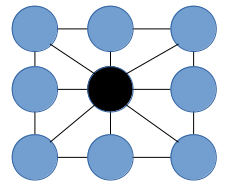
Implémenter les 2 parcours avec des ordres d'ajouts de voisins différents (horaire ,anti-horaire,indéfini) et conclure à la fin de ses essais sur la performance de ces algorithmes vis à vis de la tonte.  

In [ ]:
# PARCOURS EN LARGEUR, 8 VOISINS, SENS ANTI HORAIRE
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def bfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop(0)  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i-1,j+1) , (i-1,j), (i-1,j-1), (i,j-1), (i+1,j-1) ,(i+1,j) ,(i+1,j+1) ]
    return seen 


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = bfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()


In [ ]:
# PARCOURS EN LARGEUR , 8 VOISINS , SENS HORAIRE
import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def bfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop(0) 
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = bfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

In [ ]:
# PARCOURS EN PROFONDEUR, 8 VOISINS, SENS HORAIRE

import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()


In [ ]:
# PARCOURS EN PROFONDEUR, 8 VOISINS, SENS ANTI HORAIRE

import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i-1,j+1) , (i-1,j), (i-1,j-1), (i,j-1), (i+1,j-1) ,(i+1,j) ,(i+1,j+1) ]
    return seen 


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

In [ ]:
# PARCOURS EN PROFONDEUR, 8 VOISINS, SENS indéfini 

import cv2
# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop() 
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            cv2.waitKey(1)
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i+1,j), (i-1,j),(i,j+1), (i,j-1),(i-1,j+1), (i-1,j-1),(i+1,j+1), (i+1,j-1)] 
    return seen


if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    i,j = 20,20 # coordonnées de départ
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()


## CONCLUSION:
Quels est le parcours le mieux adapté pour résoudre notre problème de tonte de gazon? Justifier votre réponse.
* 
* 
* 
* rep: le parcours en largeur "saute" les obstacles, le parcours en profondeur correspond très bien à la tonte à la condition de stocker les voisins dans un ordre défini.

# SUITE : LE PLUS COURT CHEMIN  
Dans le notebook suivant nous nous intéresserons au cas ou la tondeuse atteint un niveau de batterie critique et doit absolument retourner à sa station de recharge en empruntant le chemin le plus court.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />